[233, 113, 61, 29, 9]


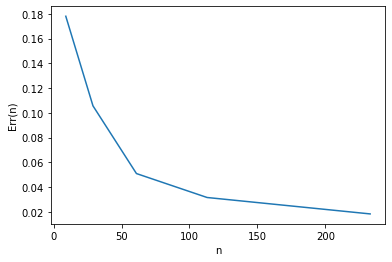

In [26]:
import random
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def parse_file(filename):
    X = []
    Y = []
    
    file = open(filename, mode = 'r', encoding = 'utf-8-sig')
    lines = file.readlines()
    file.close()
    for line in lines:
        line = line.split(' ')
        X.append([float(line[0]), float(line[1])])
        Y.append(float(line[2].strip()))
        
    return (X, Y)

X_sorted, Y_sorted = parse_file("Dbig.txt")
rand_list = [i for i in range(len(X_sorted))]
random.shuffle(rand_list)
X = []
Y = []
tree_list = []

for i in range(len(X_sorted)):
    X.append(X_sorted[rand_list[i]])
    Y.append(Y_sorted[rand_list[i]])

X_Test = X[8192:]
Y_Test = Y[8192:]
X_8192 = X[0:8192]
Y_8192 = Y[0:8192]
X_2048 = X_8192[0:2048]
Y_2048 = Y_8192[0:2048]
X_512 = X_2048[0:512]
Y_512 = Y_2048[0:512]
X_128 = X_512[0:128]
Y_128 = Y_512[0:128]
X_32 = X_128[0:32]
Y_32 = Y_128[0:32]

tree_8192 = DecisionTreeClassifier()
tree_2048 = DecisionTreeClassifier()
tree_512 = DecisionTreeClassifier()
tree_128 = DecisionTreeClassifier()
tree_32 = DecisionTreeClassifier()
tree_8192.fit(X_8192, Y_8192)
tree_2048.fit(X_2048, Y_2048)
tree_512.fit(X_512, Y_512)
tree_128.fit(X_128, Y_128)
tree_32.fit(X_32, Y_32)

tree_list = [tree_8192, tree_2048, tree_512, tree_128, tree_32]
X_list = [X_8192, X_2048, X_512, X_128, X_32]
Y_list = [Y_8192, Y_2048, Y_512, Y_128, Y_32]
err_list = []
node_count_list = []

for tree in tree_list:
    node_count_list.append(tree.tree_.node_count)
    prediction = tree.predict(X_Test)
    err_count = 0
    for i in range(len(prediction)):
        if prediction[i] != Y_Test[i]:
            err_count += 1
    err_list.append(err_count / len(prediction))
    
print(node_count_list)

plt.plot(node_count_list, err_list)
plt.xlabel("n")
plt.ylabel("Err(n)")
plt.show()